In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("zomato.csv",encoding="latin-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [17]:
missing=pd.DataFrame(df.isnull().sum()).reset_index()
missing=missing.rename(columns={"index":"Variables",0:"No_Missing_Values"})
missing.sort_values(by="No_Missing_Values",ascending=False)

,Variables,No_Missing_Values
9,Cuisines,9
0,Restaurant ID,0
11,Currency,0
19,Rating text,0
18,Rating color,0
17,Aggregate rating,0
16,Price range,0
15,Switch to order menu,0
14,Is delivering now,0
13,Has Online delivery,0


In [20]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i)

Cuisines


In [22]:
df["Cuisines"].isnull().sum()

9

In [24]:
df[df["Cuisines"].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


<Axes: >

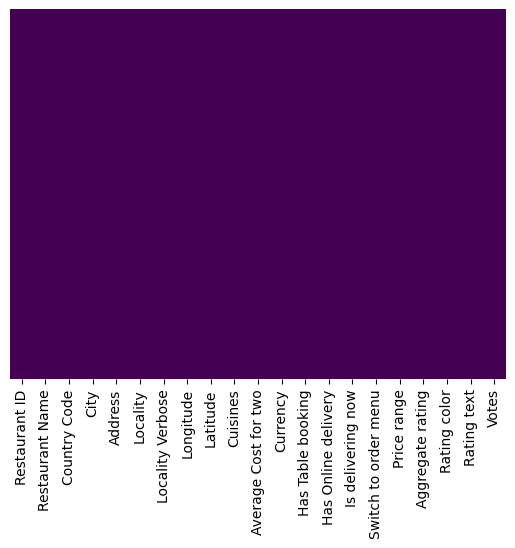

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
country=pd.read_excel('Country-Code.xlsx')
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [30]:
df=df.merge(country)

In [32]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9301,7000095,Depot Eatery and Oyster Bar,148,Auckland,"86 Federal Street, Auckland CBD, Auckland, 1010",Federal Street,"Federal Street, Auckland",174.762527,-36.848988,"Seafood, Kiwi",...,No,No,No,No,4,4.8,Dark Green,Excellent,598,New Zealand
8594,18427229,The Munchkart Cafe,1,Noida,"Shop 38, Godavari Shopping Complex, Arun Vihar...",Sector 37,"Sector 37, Noida",77.340182,28.565281,"Fast Food, Chinese",...,No,Yes,No,No,1,3.8,Yellow,Good,34,India
5498,7509,The Beer Cafe,1,New Delhi,"218 & 219, 2nd Floor, Moments Mall, Kirti Naga...","Moments Mall, Kirti Nagar","Moments Mall, Kirti Nagar, New Delhi",77.146658,28.657068,"Finger Food, North Indian",...,Yes,No,No,No,3,3.8,Yellow,Good,371,India
2715,312338,De Bone Chicken,1,New Delhi,"20, J Block, Murga Market, Near Water Tank, As...",Ashok Vihar Phase 1,"Ashok Vihar Phase 1, New Delhi",77.173069,28.687254,"Raw Meats, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,0,India
4027,18245249,M.D. Kitchen,1,New Delhi,"62, Laxmi Bai Nagar Market, Opposite INA Marke...",INA,"INA, New Delhi",77.210062,28.578375,"North Indian, Mughlai, Chinese, South Indian",...,No,Yes,No,No,2,2.6,Orange,Average,30,India


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [38]:
Country_ind=df.Country.value_counts().index
Country_ind

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [40]:
Country_val=df.Country.value_counts().values
Country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [18]:
df["Country"].value_counts().values[:3]

array([8652,  434,   80], dtype=int64)

In [19]:
df["Country"].value_counts().index[:3]

Index(['India', 'United States', 'United Kingdom'], dtype='object', name='Country')

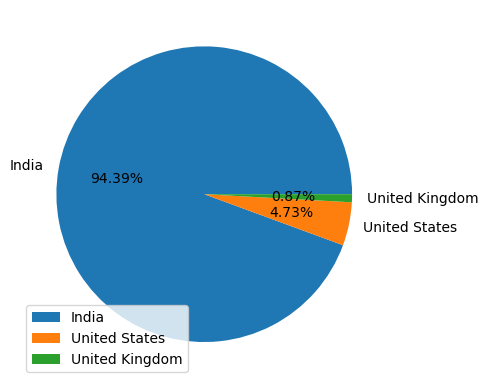

In [48]:
# Top 3 Country that use zomato
plt.pie(df["Country"].value_counts().values[:3],labels=df["Country"].value_counts().index[:3],
        autopct="%0.2f%%")
plt.legend(loc="lower left")
plt.show()

## Numerical Values:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [44]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [56]:
rating=df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:"Rating_Count"})
rating

,Aggregate rating,Rating color,Rating text,Rating_Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation: 
- Rating between 4.5 to 4.9 is Excellent
- Rating between 4.0 to 4.4 is Very Good
- Rating between 3.5 to 3.9 is Good
- Rating between 2.5 to 3.4 is Average
- Rating between 1.8 to 2.4 is Poor

<Axes: xlabel='Aggregate rating', ylabel='Rating_Count'>

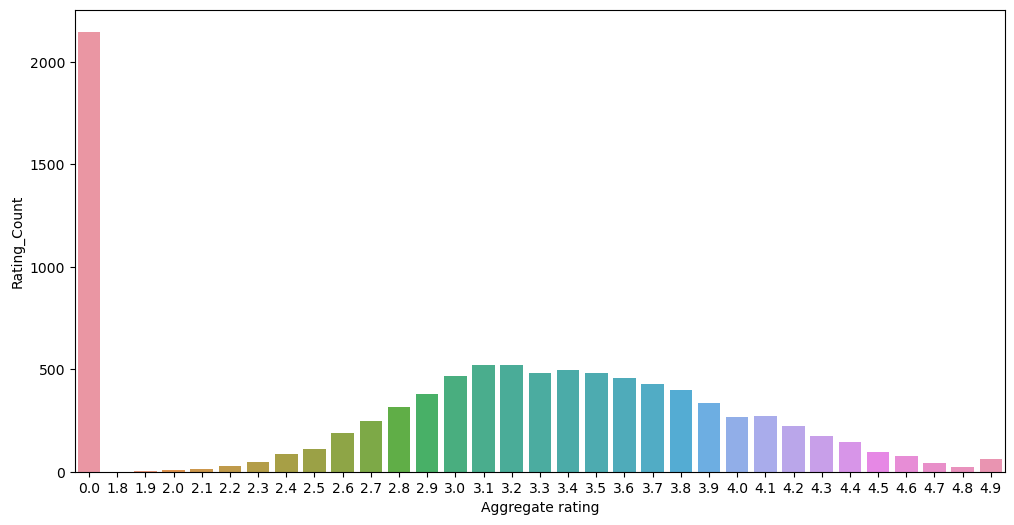

In [75]:
plt.rcParams["figure.figsize"]=(12,6)
sns.barplot(data=rating,x="Aggregate rating",y="Rating_Count")

<Axes: xlabel='Aggregate rating', ylabel='Rating_Count'>

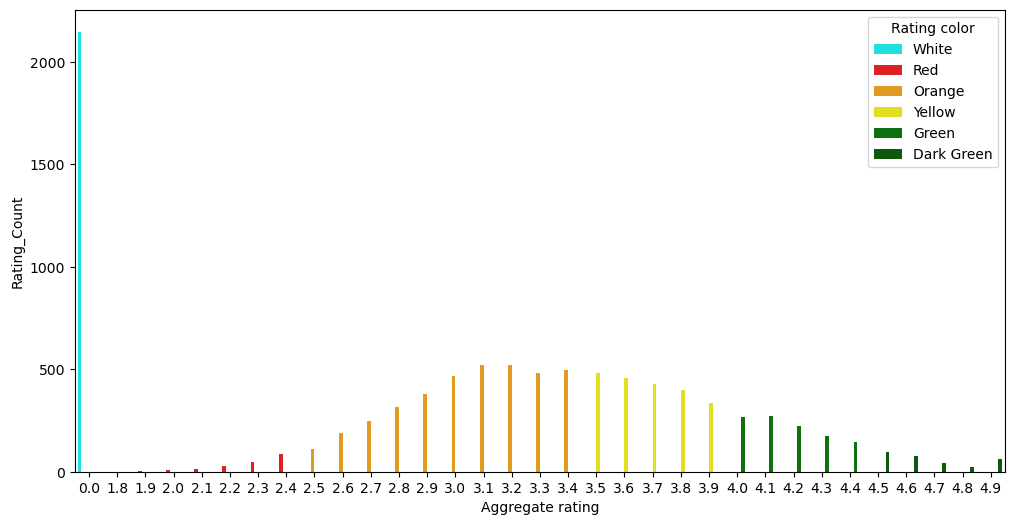

In [92]:
plt.rcParams["figure.figsize"]=(12,6)
sns.barplot(data=rating,x="Aggregate rating",y="Rating_Count",hue="Rating color",palette=['aqua', 'red', 'orange', 'yellow', 'green', 'darkgreen'])

# Observation: 
- Not Rated count is very high
- max number of rating are between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

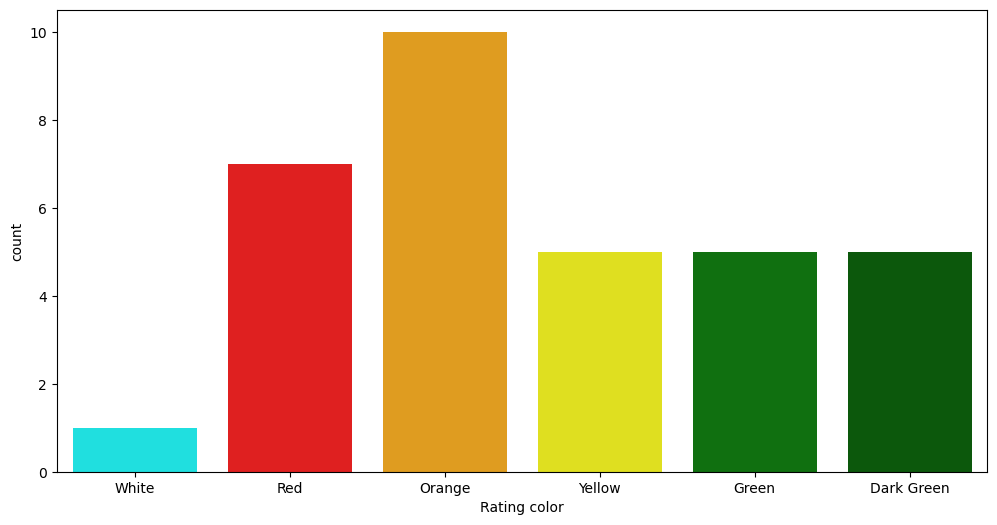

In [96]:
# count plot - used for categorial data

sns.countplot(data=rating,x="Rating color",palette=['aqua', 'red', 'orange', 'yellow', 'green', 'darkgreen'])

# find the countries name that has given 0 Rating

In [115]:
cr=df.groupby(["Country","Aggregate rating"]).size().reset_index().rename(columns={0:"Rating_Counts"})
cr

,Country,Aggregate rating,Rating_Counts
0,Australia,2.4,1
1,Australia,2.6,1
2,Australia,2.9,1
3,Australia,3.2,1
4,Australia,3.4,1
...,...,...,...
217,United States,4.5,24
218,United States,4.6,18
219,United States,4.7,9
220,United States,4.8,3


In [135]:
zero_rating=cr[cr["Aggregate rating"]==0.0]
zero_rating

,Country,Aggregate rating,Rating_Counts
12,Brazil,0.0,5
37,India,0.0,2139
180,United Kingdom,0.0,1
200,United States,0.0,3


# Observation:
- highest number of 0 rating rating are given by indian customers

# Find out which currency is used by which country

In [163]:
currency=df.groupby(["Country","Currency"]).size().reset_index()
currency.drop(columns=0,inplace=True)
currency

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


# Which countries have online delivey options

In [196]:
online_delivery=df[df["Has Online delivery"]=="Yes"]["Country"].value_counts()
online_delivery.reset_index()

,Country,count
0,India,2423
1,UAE,28


# Observation:
- online delivery available in india and uae

# create a pie chart for cities distribution

In [206]:
city_ind=df["City"].value_counts().index
city_val=df["City"].value_counts().values

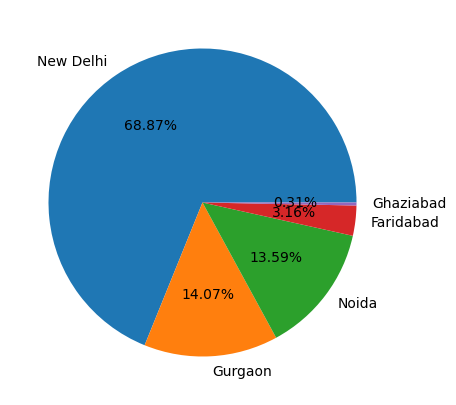

In [230]:
plt.pie(city_val[:5],labels=city_ind[:5],autopct="%0.2f%%")
plt.show()

# Observation:
- maximum number of trasaction are from new delhi aftet that gurgoan and after that noida and after that faridabad than ghaziabad

# Find the top 10 cusions 

In [244]:
Cuisines=df["Cuisines"].value_counts().reset_index().head(10)
Cuisines

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


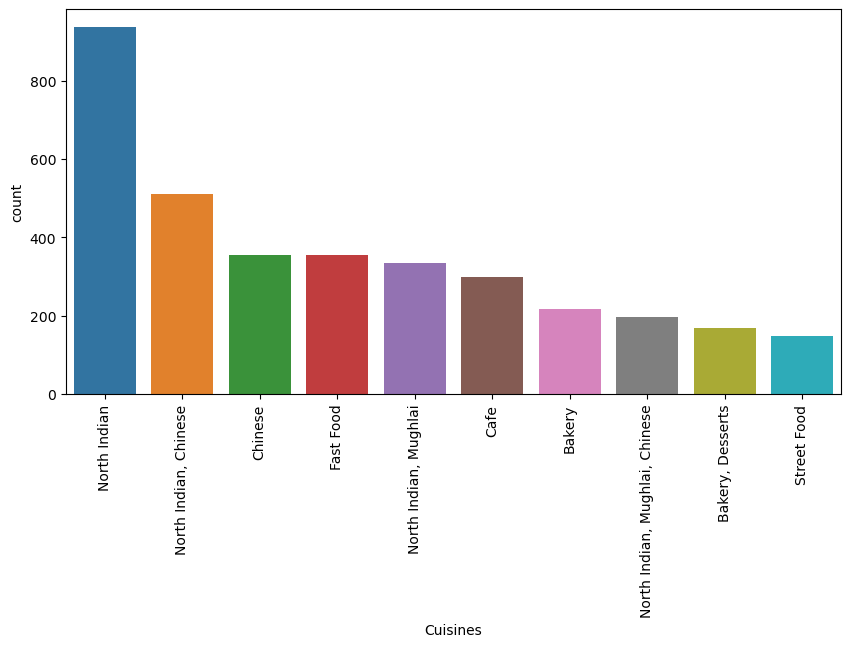

In [250]:
sns.barplot(data=Cuisines,x="Cuisines",y="count")
plt.xticks(rotation=90)
plt.show()

# Obeservation: 
- North indian food has maximum number of orders after
